# PreProcessing

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
subDataFile = ".\\dataProfitMarginSubset.csv"
data = pd.read_csv(subDataFile)
data = data.drop_duplicates('id')
print(data.columns)
data.head(3)

Index(['id', 'title', 'production_companies', 'production_countries', 'adult',
       'popularity', 'release_date', 'runtime', 'vote_average', 'vote_count',
       'actors_AveRating_average', 'actors_AveRating_total',
       'actors_RankedAveRating_average', 'actors_RankedAveRating_total',
       'actors_Top3AveRating_total', 'actors_VoteAve_average',
       'actors_VoteAve_total', 'actors_RankedVoteAve_average',
       'actors_RankedVoteAve_total', 'actors_Top3VoteAve_total',
       'actors_HistAve_average', 'actors_HistAve_total',
       'actors_RankedHistAve_average', 'actors_RankedHistAve_total',
       'actors_Top3HistAve_total', 'actors_AllMovieAve_average',
       'actors_AllMovieAve_total', 'actors_RankedAllMovieAve_average',
       'actors_RankedAllMovieAve_total', 'actors_Top3RankedAllMovieAve_total',
       'actors_AllMovieVoteAve_average', 'actors_AllMovieVoteAve_total',
       'actors_RankedAllMovieVoteAve_average',
       'actors_RankedAllMovieVoteAve_total',
       'acto

,id,title,production_companies,production_countries,adult,popularity,release_date,runtime,vote_average,vote_count,...,editorTot_HistAveRating,editorTot_AllAveRating,editorTot_AllVoteAveRating,keywordTot_AveRating,genreTot_RankedAveRating,budget,revenue,Domestic,BoxOfficeProfitMargin,profit_margin
0,862,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",True,21.946943,1995-10-30,81.0,7.7,5415.0,...,20.683709,6.726190,7.524399,6.378346,5.913436,30000000.0,373554033.0,223225679.0,644.085597,1145.18011
1,8844,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",True,17.015539,1995-12-15,104.0,6.9,2413.0,...,7.352651,6.227273,6.474549,6.078460,5.739320,65000000.0,262797249.0,100499940.0,54.615292,304.30346
2,15602,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",True,11.712900,1995-12-22,101.0,6.5,92.0,...,NaN,NaN,NaN,6.144337,5.756752,25000000.0,71500000.0,71518503.0,186.074012,186.00000


In [3]:
data.dropna(subset=['budget', 'Domestic'], inplace=True)

#cut out budgets under $2000 (value found in EDA)
data = data[data['budget']>2000]

#generate profit Ratio
data['profitRatio'] = data['Domestic']/data['budget']
data.dropna(subset=['profitRatio'], inplace=True)

## Split Data into Training/Test Sets

In [4]:
from sklearn.model_selection import train_test_split
X = data.loc[:, ~data.columns.isin(['id', 
                                    'title', 
                                    'production_companies', 
                                    'production_countries', 
                                    'adult',
                                    'BoxOfficeProfitMargin',
                                    'profit_margin',
                                    'release_date',
                                    'budget',
                                    'revenue',
                                    'Domestic',
                                    'profitRatio',
                                    'vote_count',
                                   'popularity'])]
y = data[['profitRatio']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

## Fill Null values in X sets, add ouput parameter to y sets

In [5]:
generatedColumnList = ['actors_AveRating_average', 'actors_AveRating_total',
       'actors_RankedAveRating_average', 'actors_RankedAveRating_total',
       'actors_Top3AveRating_total', 'actors_VoteAve_average',
       'actors_VoteAve_total', 'actors_RankedVoteAve_average',
       'actors_RankedVoteAve_total', 'actors_Top3VoteAve_total',
       'actors_HistAve_average', 'actors_HistAve_total',
       'actors_RankedHistAve_average', 'actors_RankedHistAve_total',
       'actors_Top3HistAve_total', 'actors_AllMovieAve_average',
       'actors_AllMovieAve_total', 'actors_RankedAllMovieAve_average',
       'actors_RankedAllMovieAve_total', 'actors_Top3RankedAllMovieAve_total',
       'actors_AllMovieVoteAve_average', 'actors_AllMovieVoteAve_total',
       'actors_RankedAllMovieVoteAve_average',
       'actors_RankedAllMovieVoteAve_total',
       'actors_Top3RankedAllMovieVoteAve_total', 'directorTot_AveRating',
       'directorTot_VoteAveRating', 'directorTot_HistAveRating',
       'directorTot_AllAveRating',
       'directorTot_AllVoteAveRating','screenwriterTot_AveRating',
       'screenwriterTot_VoteAveRating', 'screenwriterTot_HistAveRating',
       'screenwriterTot_AllAveRating','screenwriterTot_AllVoteAveRating',
       'editorTot_AveRating', 'editorTot_VoteAveRating',
       'editorTot_HistAveRating', 'editorTot_AllAveRating',
       'editorTot_AllVoteAveRating', 'keywordTot_AveRating',
       'genreTot_RankedAveRating'];

data[generatedColumnList].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6359 entries, 0 to 7584
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   actors_AveRating_average                6277 non-null   float64
 1   actors_AveRating_total                  6277 non-null   float64
 2   actors_RankedAveRating_average          6277 non-null   float64
 3   actors_RankedAveRating_total            6277 non-null   float64
 4   actors_Top3AveRating_total              6206 non-null   float64
 5   actors_VoteAve_average                  6275 non-null   float64
 6   actors_VoteAve_total                    6275 non-null   float64
 7   actors_RankedVoteAve_average            6275 non-null   float64
 8   actors_RankedVoteAve_total              6275 non-null   float64
 9   actors_Top3VoteAve_total                6205 non-null   float64
 10  actors_HistAve_average                  6277 non-null   floa

#### Fill null values of X columns with median of that column in Train set  (avoids data leakage)

In [6]:
medianReplacements = {}

for param in generatedColumnList:
    med = X_train[X_train[param].notnull()][param].median()
    medianReplacements[param] = med

X_train = X_train.fillna(value = medianReplacements)
X_test = X_test.fillna(value = medianReplacements)

#### Cut Outliers out of Training Set

In [7]:
print("Training set shape before removing outliers in output")
print("X Train: {0}".format(X_train.shape))
print("y Train: {0}".format(y_train.shape))

for col in y_train.columns:
    mean = y_train[col].mean()
    std = y_train[col].std()

    y_train = y_train[(y_train[col]<=mean+3*std) & (y_train[col]>=mean-3*std)]

X_train = X_train.filter(items = y_train.index, axis=0)
print("X Train: {0}".format(X_train.shape))
print("y Train: {0}".format(y_train.shape))

Training set shape before removing outliers in output
X Train: (4769, 44)
y Train: (4769, 1)
X Train: (4756, 44)
y Train: (4756, 1)


#### Add boxcox parameter to Y 

C:\Users\Karl\AppData\Local\Temp/ipykernel_9396/3168290814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[boxCoxString] = scipy.stats.boxcox(y_test['profitRatio'], lmbda=lamb )


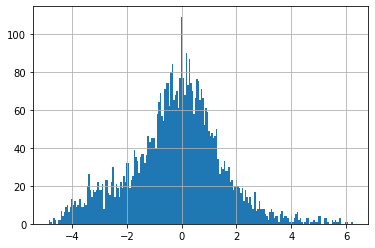

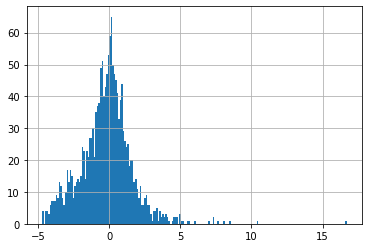

In [8]:
import scipy.stats
boxCoxString = 'profitRatio_BoxCox'

ret, lamb = scipy.stats.boxcox(y_train['profitRatio'])
y_train[boxCoxString] = ret

y_test[boxCoxString] = scipy.stats.boxcox(y_test['profitRatio'], lmbda=lamb )
    
y_train[boxCoxString].hist(bins=200)
plt.show()

y_test[boxCoxString].hist(bins=200)
plt.show()

In [41]:
print(y_train[[boxCoxString]].describe())
print(y_test[[boxCoxString]].describe()) 

       profitRatio_BoxCox
count         4756.000000
mean            -0.202095
std              1.686571
min             -4.852063
25%             -1.155227
50%             -0.088422
75%              0.791575
max              6.244415
       profitRatio_BoxCox
count         1590.000000
mean            -0.218904
std              1.820745
min             -4.723633
25%             -1.219316
50%             -0.120693
75%              0.745786
max             16.686020


In [9]:
y_train.head()

,profitRatio,profitRatio_BoxCox
565,1.129011,0.122657
908,13.552936,3.313762
6324,5.954530,2.098717
2182,0.269371,-1.170271
478,3.210082,1.295685


## Normalize X parameters

In [10]:
from sklearn.preprocessing import StandardScaler


scalar = StandardScaler()
X_train_fitted = scalar.fit_transform(X_train)
X_train_fitted = pd.DataFrame(X_train_fitted, columns=X_train.columns)
X_train_fitted.describe()

X_test_fitted = scalar.transform(X_test)
X_test_fitted = pd.DataFrame(X_test_fitted, columns=X_test.columns) 


In [11]:
X_test_fitted = scalar.transform(X_test)
X_test_fitted = pd.DataFrame(X_test_fitted, columns=X_test.columns) 
X_test_fitted.describe()

,runtime,vote_average,actors_AveRating_average,actors_AveRating_total,actors_RankedAveRating_average,actors_RankedAveRating_total,actors_Top3AveRating_total,actors_VoteAve_average,actors_VoteAve_total,actors_RankedVoteAve_average,...,screenwriterTot_HistAveRating,screenwriterTot_AllAveRating,screenwriterTot_AllVoteAveRating,editorTot_AveRating,editorTot_VoteAveRating,editorTot_HistAveRating,editorTot_AllAveRating,editorTot_AllVoteAveRating,keywordTot_AveRating,genreTot_RankedAveRating
count,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,...,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000
mean,0.011725,0.013226,0.066445,0.013861,0.017822,0.017569,-0.010548,0.038583,0.012402,0.013384,...,0.041297,0.045316,0.022618,0.022714,0.038050,0.044398,0.032867,0.035882,0.012663,0.000474
std,0.941456,0.996635,0.940196,1.024171,1.002108,1.026375,1.021616,0.974397,1.038211,1.018490,...,1.103188,1.022597,0.997795,1.116925,0.994233,1.122749,0.951400,0.935760,1.043821,0.971430
min,-5.058741,-6.727127,-5.729670,-1.312954,-3.092523,-1.852702,-4.569152,-6.485244,-1.323565,-1.819260,...,-1.533494,-12.004694,-6.468675,-11.020950,-5.659270,-1.489730,-5.547372,-4.490513,-11.415116,-4.147918
25%,-0.630201,-0.557575,-0.473033,-0.606230,-0.451083,-0.687119,-0.021298,-0.515806,-0.605522,-0.682891,...,-0.204269,-0.190317,-0.261714,-0.191560,-0.278089,-0.534233,-0.361086,-0.448289,-0.474805,-0.365742
50%,-0.164039,0.091852,0.080083,-0.210909,-0.005915,-0.233129,0.358683,0.048084,-0.212784,-0.227547,...,-0.204269,0.050425,0.062266,0.047462,0.028198,-0.210115,0.010728,0.015069,0.007970,0.109176
75%,0.476934,0.633041,0.580470,0.311366,0.424880,0.419884,0.570781,0.635640,0.327316,0.435260,...,-0.204269,0.419664,0.405674,0.363195,0.446816,0.163271,0.473903,0.552443,0.565818,0.604784
max,7.667485,2.473082,4.453253,13.586338,10.231721,4.781187,1.836807,3.302027,15.431734,4.786342,...,14.586794,4.657430,2.885923,4.365433,3.251459,8.595023,4.090230,3.297576,3.665445,2.920392


# Machine Learning

In [12]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

from sklearn import svm
from sklearn.linear_model import SGDRegressor, BayesianRidge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

def tryModels(x_tr, x_te, y_tr, y_te):



    for y_col in y_tr.columns:
        models = []
        models.append(['SVR',svm.SVR()])
        models.append(['SGD',SGDRegressor()])
        models.append(['kNN',KNeighborsRegressor()])
        models.append(['RandForr',RandomForestRegressor()])
        models.append(['AdaBoost',AdaBoostRegressor()])
        models.append(['BayesianRidge',BayesianRidge(compute_score=True)])
        models.append(['Linear',LinearRegression()])

        modelMetrics =[]   

        for mod in models:
            thisModelDict = {}
            thisModelDict['name']= mod[0]
        
            model=mod[1]
            model.fit(x_tr, y_tr[y_col])
            ypredTrain = model.predict(x_tr)
            ypred = model.predict(x_te)
            
            
            thisModelDict[y_col+'_MSE_TrainSet']=mean_squared_error(y_tr[y_col],ypredTrain)
            thisModelDict[y_col+'_MAE_TrainSet']=mean_absolute_error(y_tr[y_col],ypredTrain)
            thisModelDict[y_col+'_r2_TrainSet']= r2_score(y_tr[y_col],ypredTrain)
            thisModelDict[y_col+'_score_TrainSet']= model.score(x_tr, y_tr[y_col])
        

            thisModelDict[y_col+'_MSE_testSet']=mean_squared_error(y_te[y_col],ypred)
            thisModelDict[y_col+'_MAE_testSet']=mean_absolute_error(y_te[y_col],ypred)
            thisModelDict[y_col+'_r2_testSet']= r2_score(y_te[y_col],ypred)
            thisModelDict[y_col+'_score_testSet']= model.score(x_te, y_te[y_col])
        
            modelMetrics.append(thisModelDict)


        modDf = pd.DataFrame(modelMetrics)
        for col in modDf.columns:
            if(col=='name'):
                continue

            modDf.plot.bar(x='name', y=col, rot=90)
            plt.show()

In [13]:
def plotPredVsMeasured(ypred, ymeas, title="", show_stats=False):
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.scatter(ymeas, ypred)
    ax.plot([ymeas.min(), ymeas.max()], 
            [ymeas.min(), ymeas.max()], ls="--", c="red")

    
    minVal = min(ymeas.min(), ypred.min())
    maxVal = max(ymeas.max(), ypred.max())
    plt.xlim(minVal-1,maxVal+1)
    plt.ylim(minVal-1,maxVal+1)
    ax.set_aspect('equal', adjustable='box')
    
    
    plt.title('Y Measured vs Y Prediction')
    plt.xlabel('Y Measured')
    plt.ylabel('Y Prediction')
    
    if(title != ""):
        plt.title(title)
    plt.show()
    
    if show_stats:
        print("MSE : {0}".format(mean_squared_error(ymeas,ypred)))
        print("MAE : {0}".format(mean_absolute_error(ymeas,ypred)))
        print("R^2 : {0}".format(r2_score(ymeas,ypred)))
        
    
def plotErrorHist(ypred, ymeas, title="", show_stats=False):
    err = ypred - ymeas
    
    plt.hist(err, bins = 100)
    if(title !=""):
        plt.title(title)
    plt.show()
    
    if show_stats:
        print("Mean: {0} \tStandard Dev: {1}".format(np.mean(err), np.std(err)))
    

## Base Model Performance

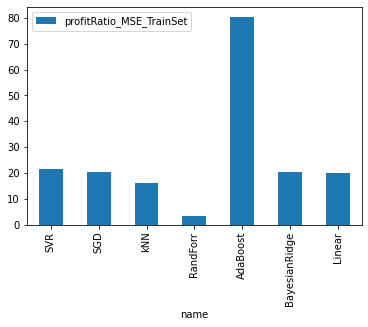

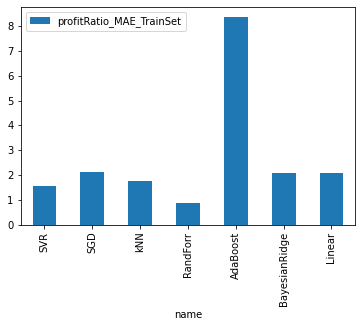

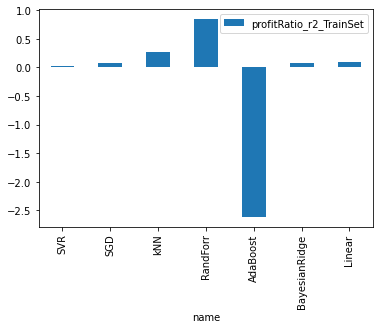

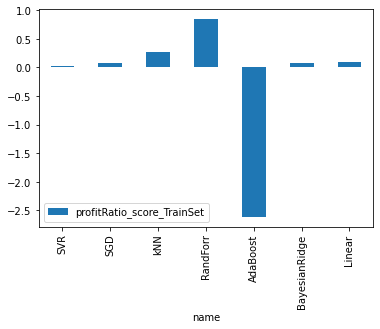

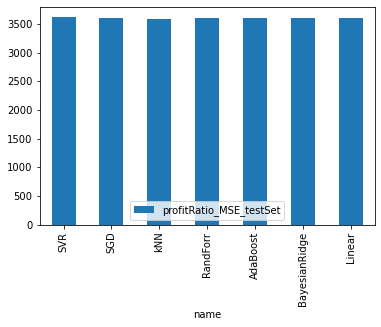

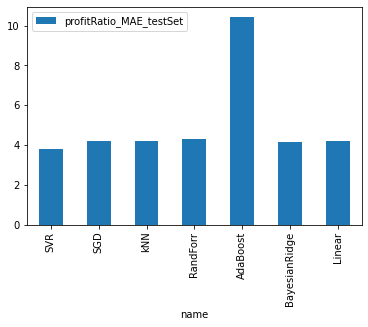

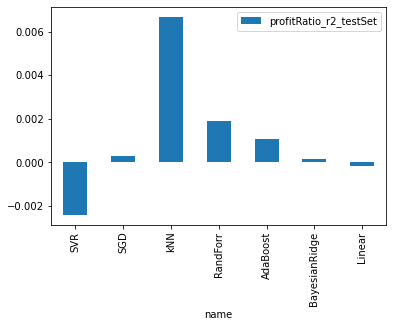

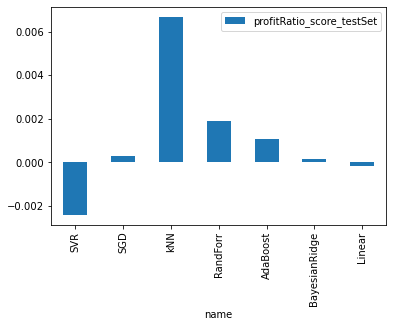

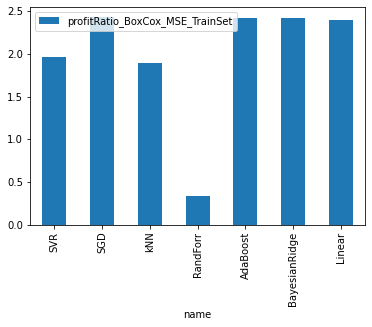

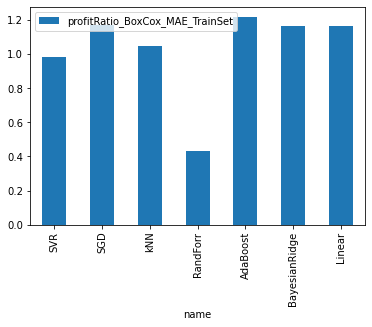

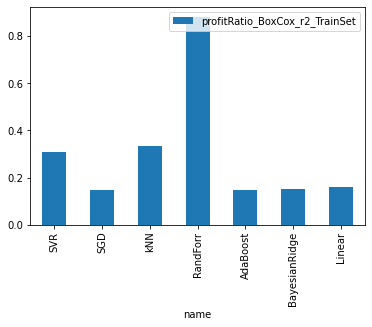

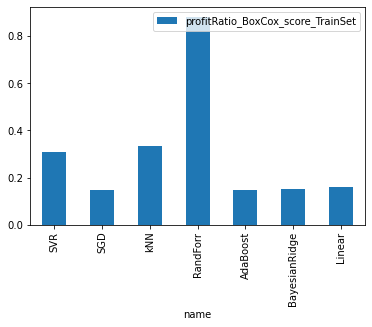

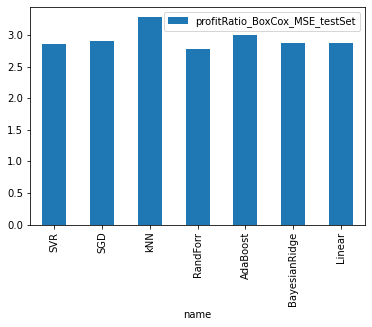

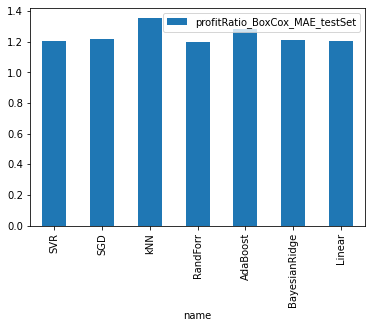

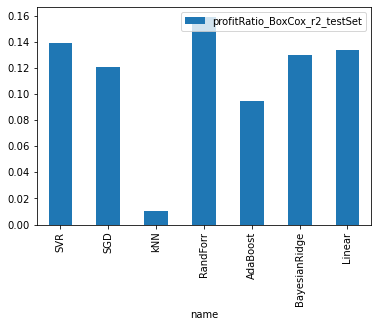

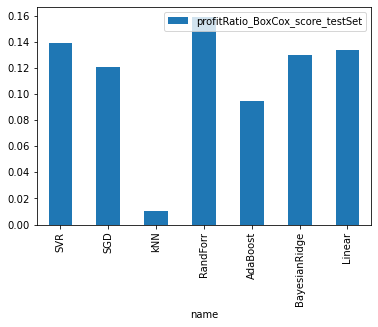

In [14]:
tryModels(X_train_fitted,X_test_fitted,y_train, y_test)

<div class="span5 alert alert-success">
    <h4>Best Performance for Random Forest, for output 'profitRatio_BoxCox'.  Train Set: R^2 > .8, Test Set: R^2 > .16 </h4>
</div> 

## Random Forrest investigation and optimization

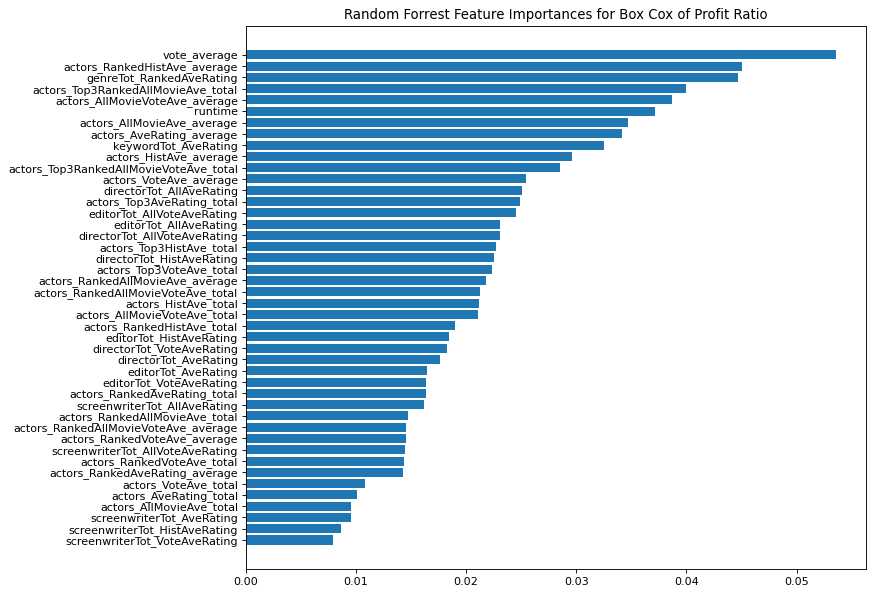

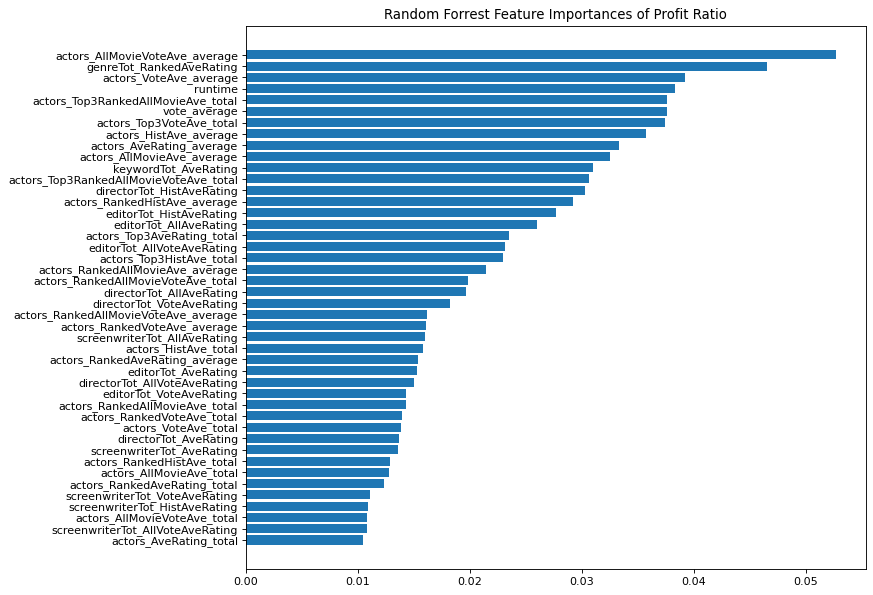

In [15]:
from matplotlib.pyplot import figure

figure(figsize=(10, 9), dpi=80)
mod = RandomForestRegressor()
mod.fit(X_train_fitted,y_train[boxCoxString])
featuresDict = {'featureName': X_train_fitted.columns, 'RF_importances':mod.feature_importances_}
featuresRF_boxCox = pd.DataFrame(featuresDict).sort_values(by='RF_importances')

plt.title('Random Forrest Feature Importances for Box Cox of Profit Ratio')
plt.barh(featuresRF_boxCox.featureName, featuresRF_boxCox.RF_importances)

plt.show()


figure(figsize=(10, 9), dpi=80)
mod = RandomForestRegressor()
mod.fit(X_train_fitted,y_train.profitRatio)
featuresDict = {'featureName': X_train_fitted.columns, 'RF_importances':mod.feature_importances_}
featuresRF = pd.DataFrame(featuresDict).sort_values(by='RF_importances')

plt.title('Random Forrest Feature Importances of Profit Ratio')
plt.barh(featuresRF.featureName, featuresRF.RF_importances)

plt.show()

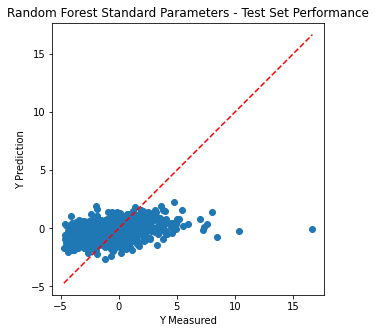

MSE : 2.799383385956045
MAE : 1.2028713138377192
R^2 : 0.15503733708840828



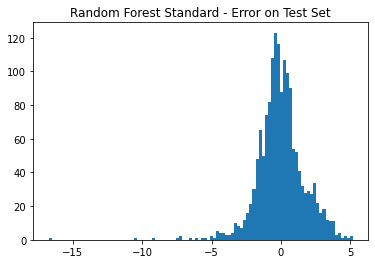

Mean: -0.01597923584035411 	Standard Dev: 1.6730594878778224




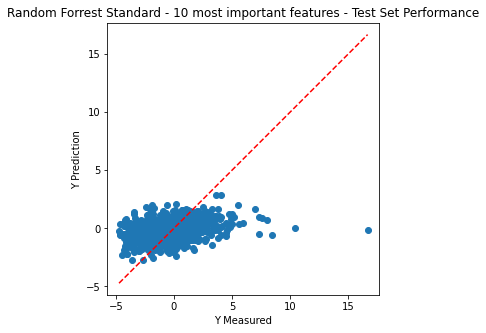

MSE : 2.874959113904663
MAE : 1.2290673479348715
R^2 : 0.13222564624987831



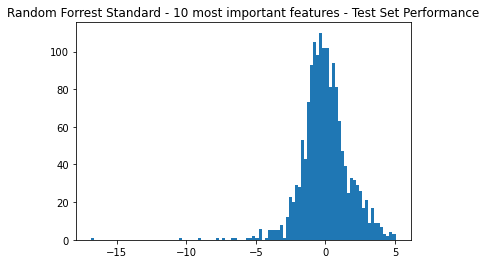

Mean: -0.000922169122617342 	Standard Dev: 1.6955701883168293


In [16]:
rf = RandomForestRegressor()
rf.fit(X_train_fitted, y_train.profitRatio_BoxCox)
ypred = rf.predict(X_test_fitted)
plotPredVsMeasured(ypred, y_test.profitRatio_BoxCox, "Random Forest Standard Parameters - Test Set Performance", True)
print()
plotErrorHist(ypred, y_test.profitRatio_BoxCox, "Random Forest Standard - Error on Test Set", True)
print()
print()

importantFeatures = np.array(featuresRF.tail(10).featureName)
rf = RandomForestRegressor()
rf.fit(X_train_fitted[importantFeatures], y_train.profitRatio_BoxCox)
ypred = rf.predict(X_test_fitted[importantFeatures])

plotPredVsMeasured(ypred, y_test.profitRatio_BoxCox, "Random Forrest Standard - 10 most important features - Test Set Performance", True)
print()
plotErrorHist(ypred, y_test.profitRatio_BoxCox, "Random Forrest Standard - 10 most important features - Test Set Performance", True)

## Optimize Random Forest with Bayesian Optimization

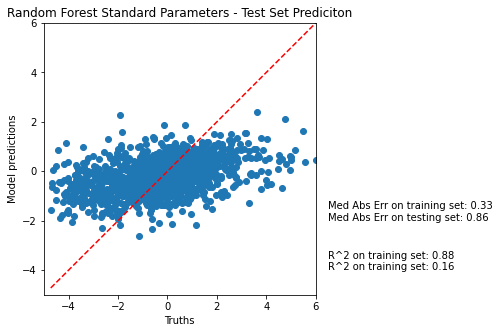

In [17]:
rf = RandomForestRegressor()
rf.fit(X_train_fitted, y_train.profitRatio_BoxCox)


y_pred = rf.predict(X_train_fitted)
mae = median_absolute_error(y_train.profitRatio_BoxCox, y_pred)
r2 = rf.score(X_train_fitted, y_train.profitRatio_BoxCox)
string_score = f"Med Abs Err on training set: {mae:.2f}"
r2_string = f"R^2 on training set: {r2:.2f}"


y_pred = rf.predict(X_test_fitted)
mae = median_absolute_error(y_test.profitRatio_BoxCox, y_pred)
r2 = rf.score(X_test_fitted, y_test.profitRatio_BoxCox)
string_score += f"\nMed Abs Err on testing set: {mae:.2f}"
r2_string += f"\nR^2 on training set: {r2:.2f}"
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test.profitRatio_BoxCox, y_pred)
ax.plot([y_test.profitRatio_BoxCox.min(), y_test.profitRatio_BoxCox.max()], 
        [y_test.profitRatio_BoxCox.min(), y_test.profitRatio_BoxCox.max()], ls="--", c="red")
plt.text(6.5,-2,string_score)
plt.text(6.5,-4,r2_string)
plt.title("Random Forest Standard Parameters - Test Set Prediciton")

plt.xlim(-5,6)
plt.ylim(-5,6)
ax.set_aspect('equal', adjustable='box')
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.show()

In [18]:
coefs = pd.DataFrame(
    rf.feature_importances_,
    columns=["Feature Importances"],
    index=X_train_fitted.columns
)

coefs.sort_values(by="Feature Importances", ascending=False)

,Feature Importances
vote_average,0.053397
actors_RankedHistAve_average,0.048080
genreTot_RankedAveRating,0.045087
actors_Top3RankedAllMovieAve_total,0.040687
actors_AllMovieVoteAve_average,0.039519
actors_AveRating_average,0.035156
runtime,0.033993
actors_AllMovieAve_average,0.033372
keywordTot_AveRating,0.031894
actors_Top3RankedAllMovieVoteAve_total,0.028454


### Define optimization error metric

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


def rf_eval(n_estimators,
            max_depth,
            max_features,
            min_samples_split=2, 
            min_samples_leaf=1, 
            min_weight_fraction_leaf=0.0,
            min_impurity_decrease=0.0, 
            ccp_alpha=0.0):
    
    rf = RandomForestRegressor(n_estimators=round(n_estimators),
                              max_depth=round(max_depth) if max_depth!=None else None,
                              min_samples_leaf=round(min_samples_leaf),
                              min_weight_fraction_leaf = min_weight_fraction_leaf,
                              min_samples_split=round(min_samples_split),
                              max_features=round(max_features),
                              min_impurity_decrease=min_impurity_decrease,
                              ccp_alpha=ccp_alpha,
                              random_state=50)
    
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(rf, X_train_fitted, y_train.profitRatio_BoxCox, cv=cv, n_jobs=-1)
    return np.median(scores)




### First Optimization, wide paramter spread

In [20]:
rfBO = BayesianOptimization(rf_eval, {'n_estimators': (90, 110),
                                        'max_depth': (40, 60),
                                        'min_samples_split': (2, 10),
                                        'min_samples_leaf': (1, 10),
                                        'min_weight_fraction_leaf': (0.0, 0.5),
                                        'min_impurity_decrease': (0.0,0.2),
                                        'ccp_alpha': (0.0, 0.2),
                                        'max_features':(len(X_train_fitted.columns)-20,len(X_train_fitted.columns))
                                       })

rfBO.maximize(n_iter=80, init_points=5)

|   iter    |  target   | ccp_alpha | max_depth | max_fe... | min_im... | min_sa... | min_sa... | min_we... | n_esti... |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.04579  |  0.06617  |  49.22    |  34.12    |  0.03785  |  3.382    |  5.871    |  0.1452   |  100.3    |
|  2        | -0.000568 |  0.111    |  45.22    |  31.62    |  0.1369   |  6.716    |  7.901    |  0.135    |  94.92    |
|  3        | -0.000906 |  0.184    |  49.08    |  39.2     |  0.008268 |  1.575    |  7.011    |  0.2388   |  108.4    |
|  4        | -0.000912 |  0.02747  |  43.5     |  39.87    |  0.1997   |  9.674    |  8.976    |  0.4881   |  90.62    |
|  5        | -0.000912 |  0.133    |  46.56    |  34.46    |  0.1716   |  3.151    |  9.903    |  0.1256   |  91.45    |
|  6        |  0.04602  |  0.06057  |  50.68    |  34.53    |  0.05412  |  3.399    |  5.902    |  0.2001   |  100.7    |
|  7        |  0.1476   

|  41       | -0.000903 |  0.0      |  40.0     |  29.46    |  0.1649   |  10.0     |  10.0     |  0.0      |  110.0    |
|  42       |  0.1516   |  0.0      |  52.39    |  24.0     |  0.0      |  3.407    |  8.757    |  0.0      |  103.0    |
|  43       |  0.1589   |  0.0      |  60.0     |  30.43    |  0.0      |  8.251    |  10.0     |  0.0      |  96.73    |
|  44       |  0.1531   |  0.0      |  60.0     |  44.0     |  0.0      |  1.0      |  10.0     |  0.0      |  90.0     |
|  45       |  0.1554   |  0.0      |  47.36    |  24.0     |  0.0      |  10.0     |  10.0     |  0.0      |  102.9    |
|  46       |  0.1513   |  0.0      |  60.0     |  36.41    |  0.0      |  1.0      |  10.0     |  0.0      |  90.0     |
|  47       |  0.1546   |  0.0      |  60.0     |  44.0     |  0.0      |  1.0      |  2.066    |  0.0      |  90.0     |
|  48       | -0.000909 |  0.2      |  60.0     |  44.0     |  0.0      |  8.558    |  10.0     |  0.5      |  90.0     |
|  49       | -0.000909 

|  82       | -0.000909 |  0.2      |  60.0     |  31.86    |  0.0      |  4.339    |  10.0     |  0.0      |  98.73    |
|  83       |  0.1483   |  0.0      |  59.73    |  30.24    |  0.0      |  6.469    |  3.287    |  0.0      |  100.5    |
|  84       |  0.1522   |  0.0      |  56.33    |  24.47    |  0.0      |  7.069    |  8.847    |  0.0      |  102.7    |
|  85       |  0.1523   |  0.0      |  59.97    |  32.69    |  0.0      |  2.687    |  7.206    |  0.0      |  92.08    |


In [21]:
rfBO.max

{'target': 0.16732567085353622,
 'params': {'ccp_alpha': 0.0,
  'max_depth': 50.676077041094196,
  'max_features': 24.71254334767144,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 5.10668074658092,
  'min_samples_split': 3.553623522581768,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 101.14927676515246}}

RandomForestRegressor(max_depth=51, max_features=25, min_samples_leaf=5,
                      min_samples_split=4, n_estimators=101, random_state=50)


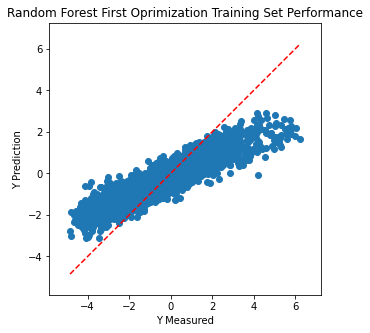

MSE : 0.8711301020689038
MAE : 0.6688260174110391
R^2 : 0.6936872354035357




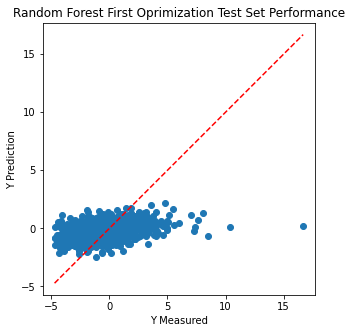

MSE : 2.7615067661006263
MAE : 1.1919977562358146
R^2 : 0.16646997248078932



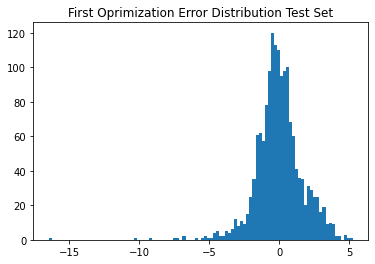

Mean: 0.0012127691818250735 	Standard Dev: 1.6617777514732646


In [22]:
rfParam = ['n_estimators',
           'max_depth',
           'min_samples_split',
           'min_samples_leaf',
           'min_weight_fraction_leaf',
           'min_impurity_decrease',
           'ccp_alpha',
           'max_features']

rounded = ['max_depth',
           'max_features', 
           'min_samples_split', 
           'min_samples_leaf', 
           'max_leaf_nodes',
           'n_estimators']

randForPar = {x: round(rfBO.max['params'][x]) if x in rounded  else rfBO.max['params'][x] for x in rfParam }
randForPar['random_state']=50
rfOptimized = RandomForestRegressor(**randForPar)

print(rfOptimized)

rfOptimized.fit(X_train_fitted,y_train.profitRatio_BoxCox)

ypred = rfOptimized.predict(X_test_fitted)
ypredTrain = rfOptimized.predict(X_train_fitted)

plotPredVsMeasured(ypredTrain, y_train.profitRatio_BoxCox, 'Random Forest First Oprimization Training Set Performance',True)
print()
print()
plotPredVsMeasured(ypred, y_test.profitRatio_BoxCox, 'Random Forest First Oprimization Test Set Performance', True)
print()
plotErrorHist(ypred, y_test.profitRatio_BoxCox,'First Oprimization Error Distribution Test Set', True)

### Second Optimization, narrow paramter spread

In [23]:
rfBO2 = BayesianOptimization(rf_eval, {'n_estimators': (125, 250),
                                        'max_depth': (37, 55),
                                        'max_features':(10,40)
                                       })

rfBO2.maximize(n_iter=50, init_points=3)

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
|  1        |  0.1486   |  52.79    |  23.73    |  211.7    |
|  2        |  0.1533   |  40.41    |  35.55    |  131.6    |
|  3        |  0.1444   |  42.08    |  10.31    |  162.7    |
|  4        |  0.1511   |  41.06    |  34.58    |  131.5    |
|  5        |  0.1575   |  40.83    |  37.53    |  133.0    |
|  6        |  0.157    |  38.13    |  37.97    |  136.1    |
|  7        |  0.1561   |  37.3     |  39.97    |  132.4    |
|  8        |  0.1581   |  43.13    |  39.79    |  139.6    |
|  9        |  0.1577   |  48.53    |  40.0     |  135.3    |
|  10       |  0.1573   |  50.31    |  38.2     |  144.2    |
|  11       |  0.1566   |  42.29    |  38.01    |  149.1    |
|  12       |  0.1576   |  52.03    |  39.68    |  153.1    |
|  13       |  0.1551   |  50.39    |  31.22    |  151.3    |
|  14       |  0.1578   |  45.64    |  40.0     |  158.8    |
|  15   

In [24]:
rfBO2.max

{'target': 0.16096381402687632,
 'params': {'max_depth': 37.636444459918316,
  'max_features': 39.300596201652986,
  'n_estimators': 160.18679444540757}}

RandomForestRegressor(max_depth=38, max_features=39, n_estimators=160,
                      random_state=50)


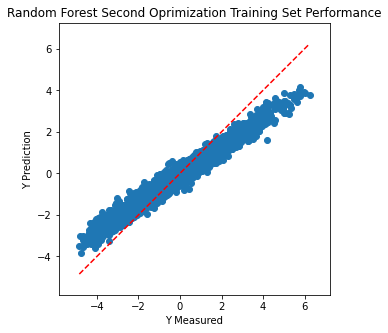

MSE : 0.3343961152603857
MAE : 0.4316499854236619
R^2 : 0.882417335490463




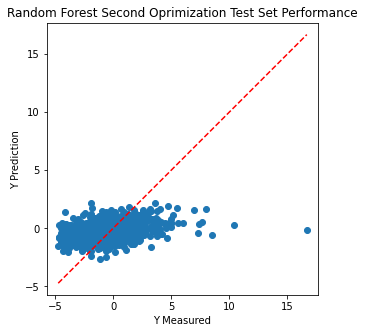

MSE : 2.762038502829518
MAE : 1.1942630273074142
R^2 : 0.16630947367785076



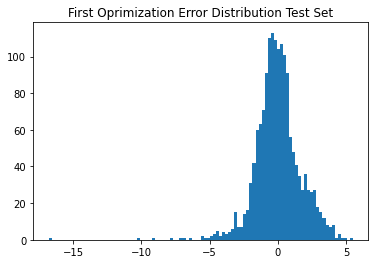

Mean: 0.0011202869675978533 	Standard Dev: 1.661937799012534


In [26]:
rounded = ['max_depth',
           'max_features', 
           'min_samples_split', 
           'min_samples_leaf', 
           'max_leaf_nodes',
           'n_estimators']

refinedParameters = ['n_estimators','max_depth','max_features']
                                        
randForPar = {x: round(rfBO2.max['params'][x]) if x in rounded  else rfBO2.max['params'][x] for x in refinedParameters }
randForPar['random_state']=50
rfOptimized = RandomForestRegressor(**randForPar)

print(rfOptimized)

rfOptimized.fit(X_train_fitted,y_train.profitRatio_BoxCox)

ypred = rfOptimized.predict(X_test_fitted)
ypredTrain = rfOptimized.predict(X_train_fitted)

plotPredVsMeasured(ypredTrain, y_train.profitRatio_BoxCox,'Random Forest Second Oprimization Training Set Performance',True)
print()
print()
plotPredVsMeasured(ypred, y_test.profitRatio_BoxCox,'Random Forest Second Oprimization Test Set Performance',True)
print()
plotErrorHist(ypred, y_test.profitRatio_BoxCox,'First Oprimization Error Distribution Test Set', True)

<div class="span5 alert alert-success">
    <h4>It is clear that although a Random Forest model performs the best on the Training Set, it is overfitting as the model doess not generalize well to the Test Set.  At first, I thought something wrong with the way the Box Cox was calculated for the Test Set, but Cross Validation on the Training Set had consistent results with those seen on the Test Set.
    </h4>
    <h4>There is a clear indication that those features engineered from the original dataset of movies do not have powerful predictive power for the profit of those movies</h4>
</div> 

# Add First Listed Production Company to Model

### Import Data

In [28]:
prodCompaniesDF = pd.read_csv("movieData_SeparatedProductionCompanies.csv")

numOfTopProdComps = 60
#Only keep first listed production company
topProdCompaniesDF = prodCompaniesDF.drop_duplicates(subset='id')

mostCommon = topProdCompaniesDF.ProductionCompany_Name.value_counts().sort_values(ascending=True).iloc[-numOfTopProdComps:]
per = len(topProdCompaniesDF[topProdCompaniesDF['ProductionCompany_Name'].isin(list(mostCommon.keys()))])/len(topProdCompaniesDF)

print("Using first listed production company for each movie, top {0} production companies listed accounts for {1:.2f} precent of dataset".format(numOfTopProdComps, per*100))
print()
mostCommonDF = topProdCompaniesDF[topProdCompaniesDF['ProductionCompany_Name'].isin(list(mostCommon.keys()))]
print(mostCommonDF.ProductionCompany_Name.value_counts())

Using first listed production company for each movie, top 60 production companies listed accounts for 59.69 precent of dataset

Universal Pictures                        359
Paramount Pictures                        349
Twentieth Century Fox Film Corporation    248
Columbia Pictures                         239
New Line Cinema                           184
Walt Disney Pictures                      156
Warner Bros.                              125
Miramax Films                              92
TriStar Pictures                           89
Columbia Pictures Corporation              84
United Artists                             80
Village Roadshow Pictures                  75
DreamWorks SKG                             66
Fox Searchlight Pictures                   61
Touchstone Pictures                        60
Metro-Goldwyn-Mayer (MGM)                  53
Summit Entertainment                       50
Orion Pictures                             48
Regency Enterprises                        4

In [29]:
prodCompaniesDF.columns

Index(['id', 'title', 'production_companies', 'production_countries', 'adult',
       'popularity', 'release_date', 'runtime', 'vote_average', 'vote_count',
       'actors_AveRating_average', 'actors_AveRating_total',
       'actors_RankedAveRating_average', 'actors_RankedAveRating_total',
       'actors_Top3AveRating_total', 'actors_VoteAve_average',
       'actors_VoteAve_total', 'actors_RankedVoteAve_average',
       'actors_RankedVoteAve_total', 'actors_Top3VoteAve_total',
       'actors_HistAve_average', 'actors_HistAve_total',
       'actors_RankedHistAve_average', 'actors_RankedHistAve_total',
       'actors_Top3HistAve_total', 'actors_AllMovieAve_average',
       'actors_AllMovieAve_total', 'actors_RankedAllMovieAve_average',
       'actors_RankedAllMovieAve_total', 'actors_Top3RankedAllMovieAve_total',
       'actors_AllMovieVoteAve_average', 'actors_AllMovieVoteAve_total',
       'actors_RankedAllMovieVoteAve_average',
       'actors_RankedAllMovieVoteAve_total',
       'acto

### Set X and y

In [30]:
X = mostCommonDF.loc[:, ~prodCompaniesDF.columns.isin(['id', 
                                    'title', 
                                    'production_companies', 
                                    'production_countries', 
                                    'adult',
                                    'BoxOfficeProfitMargin',
                                    'profit_margin',
                                    'release_date',
                                    'budget',
                                    'revenue',
                                    'Domestic',
                                    'profitRatio',
                                    'vote_count',
                                    'popularity',
                                    'logProfitRatio', 
                                    'profitRatio_BoxCox', 
                                    'ProductionCompany_Id'])]
y = mostCommonDF[['profitRatio']]

### Prep categorical variable for the 60 most common production companies

In [31]:
Xprep = pd.get_dummies(X)

### Train Test Split

In [32]:
X_tr_Prod, X_te_Prod, y_tr_Prod, y_te_Prod = train_test_split(Xprep,y,test_size=0.33, random_state=100)

### Fill NA in X, and make boxcox for y

C:\Users\Karl\AppData\Local\Temp/ipykernel_9396/561959124.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_tr_Prod[boxCoxString] = ret
C:\Users\Karl\AppData\Local\Temp/ipykernel_9396/561959124.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_te_Prod[boxCoxString] = scipy.stats.boxcox(y_te_Prod['profitRatio'], lmbda=lamb )


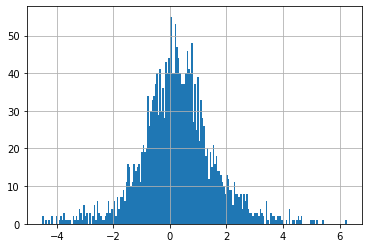

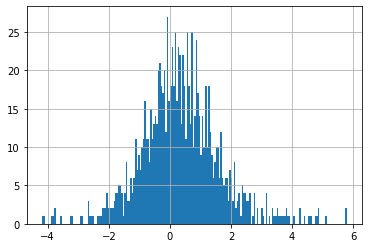

In [33]:
medianReplacements = {}

for param in generatedColumnList:
    med = X_tr_Prod[X_tr_Prod[param].notnull()][param].median()
    medianReplacements[param] = med

X_tr_Prod = X_tr_Prod.fillna(value = medianReplacements)
X_te_Prod = X_te_Prod.fillna(value = medianReplacements)

import scipy.stats
boxCoxString = 'profitRatio_BoxCox'

ret, lamb = scipy.stats.boxcox(y_tr_Prod['profitRatio'])
y_tr_Prod[boxCoxString] = ret

y_te_Prod[boxCoxString] = scipy.stats.boxcox(y_te_Prod['profitRatio'], lmbda=lamb )
    
y_tr_Prod[boxCoxString].hist(bins=200)
plt.show()

y_te_Prod[boxCoxString].hist(bins=200)
plt.show()

### Scale X

In [34]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_tr_Prod_fitted = scalar.fit_transform(X_tr_Prod)
X_tr_Prod_fitted = pd.DataFrame(X_tr_Prod_fitted, columns=X_tr_Prod.columns)

X_te_Prod_fitted = scalar.transform(X_te_Prod)
X_te_Prod_fitted = pd.DataFrame(X_te_Prod_fitted, columns=X_te_Prod.columns)

## Base Model Performance

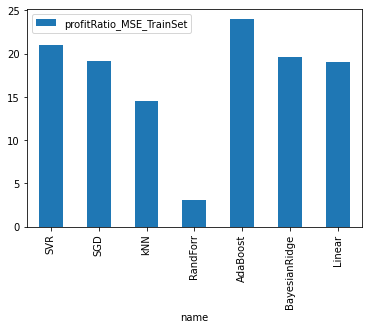

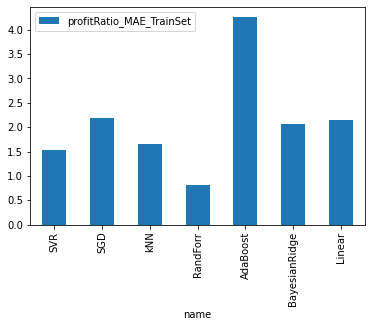

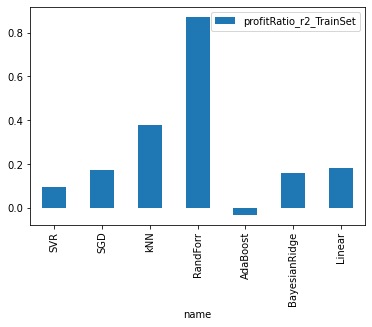

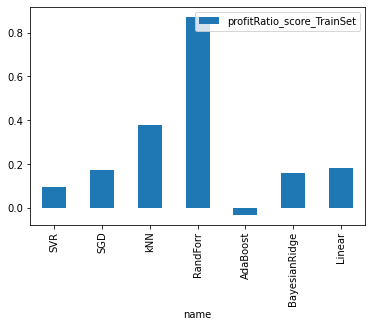

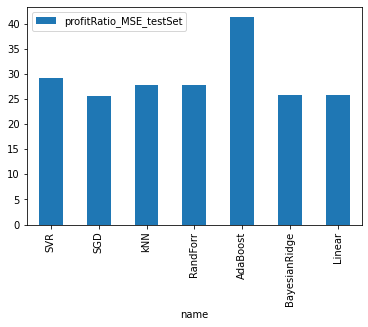

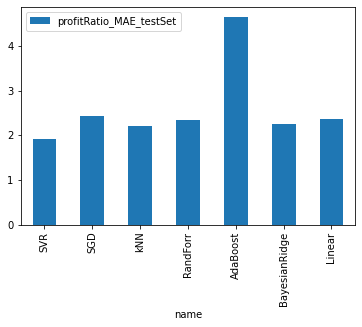

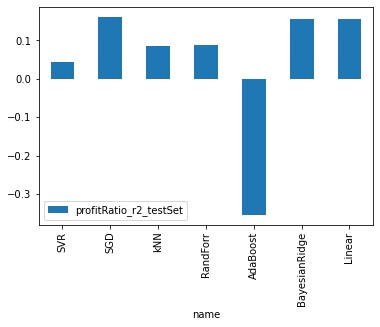

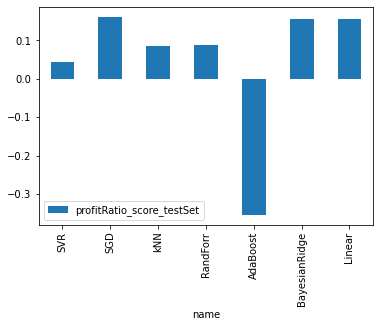

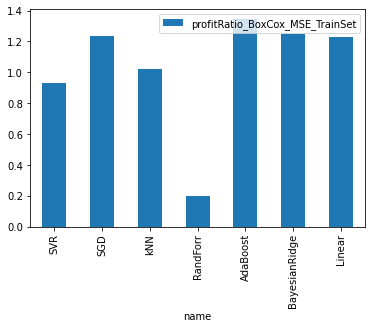

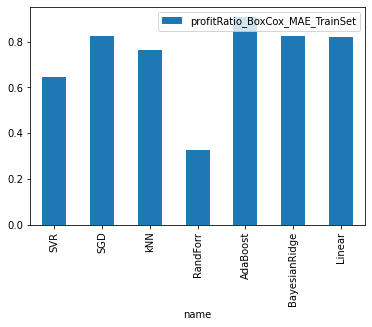

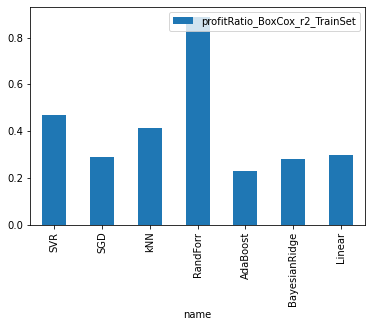

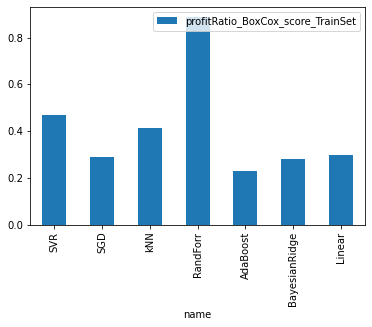

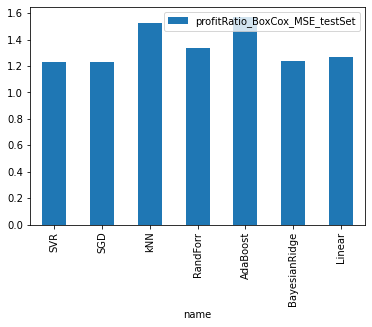

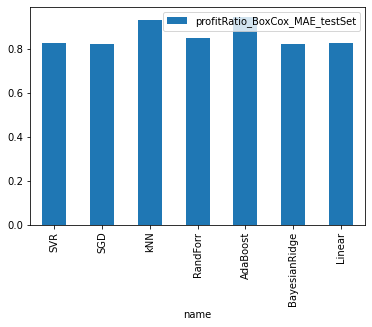

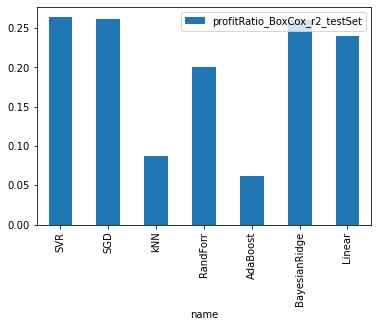

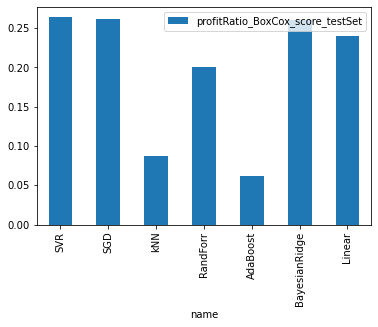

In [35]:
tryModels(X_tr_Prod_fitted ,X_te_Prod_fitted ,y_tr_Prod, y_te_Prod)

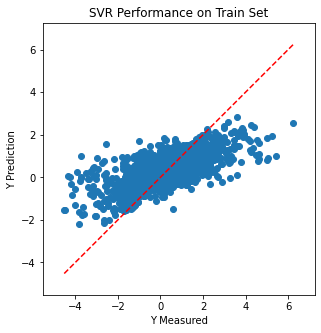

MSE : 0.9279390099611304
MAE : 0.6458073400841817
R^2 : 0.46751896761837597




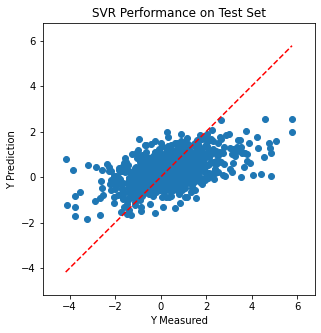

MSE : 1.2305133734887452
MAE : 0.8272464395863952
R^2 : 0.26370971163830637



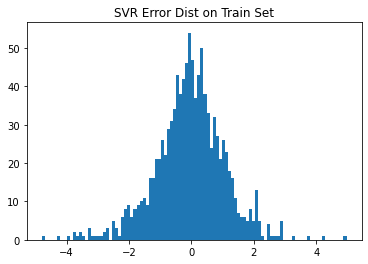

Mean: -0.049352659360356266 	Standard Dev: 1.108186666813316


In [36]:
mod = svm.SVR()
mod.fit(X_tr_Prod_fitted ,y_tr_Prod.profitRatio_BoxCox)
ypredTrain = mod.predict(X_tr_Prod_fitted)
ypred = mod.predict(X_te_Prod_fitted)

plotPredVsMeasured(ypredTrain, y_tr_Prod.profitRatio_BoxCox, "SVR Performance on Train Set",True)
print()
print()
plotPredVsMeasured(ypred, y_te_Prod.profitRatio_BoxCox,"SVR Performance on Test Set",True)
print()
plotErrorHist(ypred, y_te_Prod.profitRatio_BoxCox,"SVR Error Dist on Train Set",True)

<div class="span5 alert alert-success">
    <h4>Including the Production Companies does result in a higher R^2 value, but this is likely due to the higher parameter count, and it is still too low to make meaningful predictions of the profit ratio. </h4>
</div> 